# Session 3 Exercises
These are sample answers for the in-class exercises in Session 3 of PHAS0030.  You should make sure that you can do these yourself ! The further work exercises will be in a separate notebook.

In [1]:
# We always start with appropriate imports; note the use of the IPython magic
# command to set up Matplotlib within the notebook
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

## 3. Grids

### Question 1

Note we plot with points, to make the plot clear (with lines, nothing can be seen).  The linear plot makes it clear how detail near zero is lost, while the semi-log plot shows evenly spaced points (as would be expected).

<IPython.core.display.Javascript object>


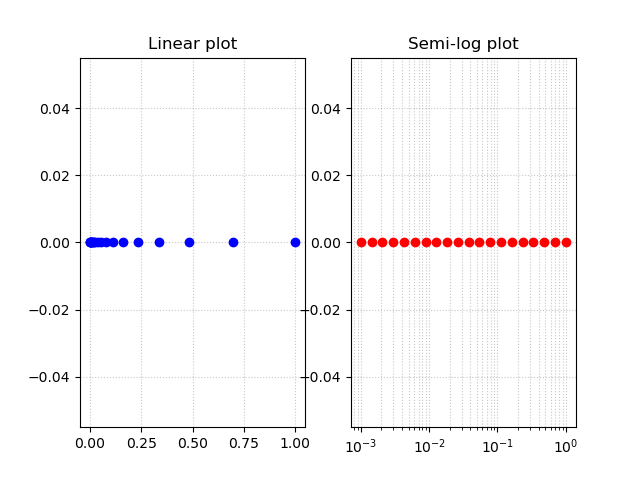

Text(0.5, 1.0, 'Linear plot')

In [2]:
N = 20
x = np.logspace(-3,0,num=N)
y = np.zeros(N)
fig1 = plt.figure()
ax1 = fig1.add_subplot(1,2,1)
ax1.plot(x,y,'bo')
ax1.grid(True, alpha=0.7, linestyle=':', which='both', axis='both')
ax1.set_title("Linear plot")

### Question 2

In [3]:

ax2 = fig1.add_subplot(1,2,2)
ax2.semilogx(x,y,'ro')
ax2.grid(True, alpha=0.7, linestyle=':', which='both', axis='both')
ax2.set_title("Semi-log plot")

Text(0.5, 1.0, 'Semi-log plot')

(See the figure *above* for the answer.)

Note that if you want to change either graph you can re-use the `ax1.plot` and `ax2.semilogx` commands but you should *not* reuse the `fig1.add_subplot` command (this may generate a warning).

### Question 3

<IPython.core.display.Javascript object>


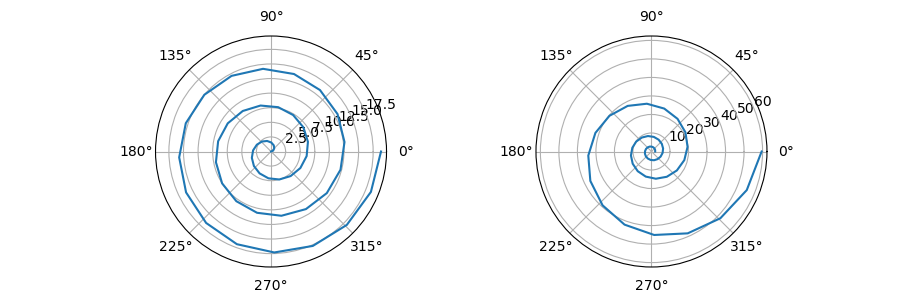

In [4]:
# Define parameters for Archimedes spiral, r = a + b theta
a = 0.0
b = 1.0
theta = np.linspace(0,6*np.pi)
r = a + b*theta
fig2 = plt.figure(figsize=(9,3))
ax_q3 = fig2.add_subplot(1,2,1,polar=True)
ax_q3.plot(theta,r)

### Question 4

In [5]:
# Parameters for logarithmic spiral
a_log = 2
b_log = 0.18
r_log = a_log*np.exp(b_log*theta)
ax_q4 = fig2.add_subplot(1,2,2,polar=True)
ax_q4.plot(theta,r_log)

Notice the different radial scales for the two spirals.

## 4. Differentiation

#### Question 1

In [6]:
def forwardFD(fun,x,dx):
    """Calculate first order forward finite-difference of given function
    Inputs:
    
    fun (function to be differentiated)
    x   
    dx  (finite difference)
    Returns:
    
    finite difference (at x+dx/2)
    """
    df = fun(x + dx) - fun(x)
    return df/dx

#### Question 2

Once `dx` is smaller than 1e-8, the approximation becomes worse; this is likely due to how NumPy calculates sine and cosine, and equivalent errors being amplified by the very small difference in `x`.

<IPython.core.display.Javascript object>


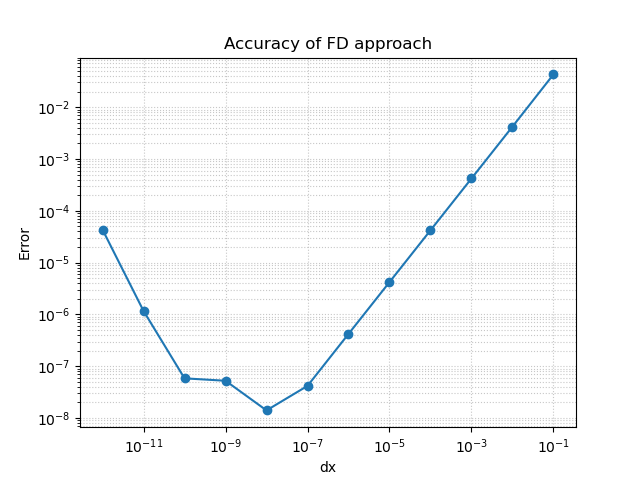

In [7]:
x = 1.0
# Array of differences to test
N = 12
dx_array = np.logspace(-N,-1,N)
results = np.zeros(N)
for i, dx in enumerate(dx_array):
    results[i] = abs(forwardFD(np.sin,x,dx) - np.cos(x))
# log-log plot for clarity
plt.loglog(dx_array,results,'o-')
plt.grid(True,linestyle=':')
plt.xlabel('dx')
plt.ylabel('Error')
plt.title('Accuracy of FD approach')
plt.grid(True, alpha=0.7, linestyle=':', which='both', axis='both')

#### Question 3

<IPython.core.display.Javascript object>


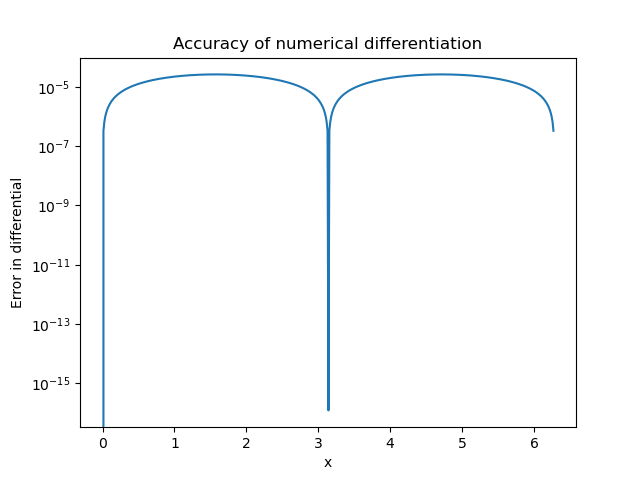

Text(0, 0.5, 'Error in differential')

In [8]:
dx = 2*np.pi/500
# Exclude end point as this is a periodic function (2*np.pi is equivalent to zero)
x_roll = np.arange(0,2*np.pi,dx)
cos_roll= np.cos(x_roll)
sin_roll = np.sin(x_roll)
fdc_roll = (np.roll(cos_roll,-1) - np.roll(cos_roll,1))/(2*dx)
# we know that the differential of cos is -sin, so we add sin here to find the difference
plt.semilogy(x_roll,abs(fdc_roll+sin_roll))
plt.title("Accuracy of numerical differentiation")
plt.xlabel("x")
plt.ylabel("Error in differential")

Note that if you choose a simple value of `dx` like 0.01 (as I did at first) then the differentials at the *ends* of the array are wrong because the array does not wrap quite perfectly with the period of the function.  The ends of arrays when doing this kind of finite difference need care...

## 5. Integration

#### Question 1
Note that I have two approaches here: the first is straightforward, but involves iterating over all elements of the array.  The second creates a NumPy array for x and is likely to be more efficient.

In [9]:
def rectangle_int(f,a,b,N):
    """Implement integration using rectangle rule
    Inputs:
    f    (function to be integrated)
    a, b (limits in integration)
    N    (number of points)
    Returns value of integral"""
    integral= 0.0
    dx = (b-a)/N
    for i in range(N):
        integral += f(a+i*dx)
    integral *= dx
    return integral

In [10]:
def rectangle_int2(f,a,b,N):
    """Implement integration using rectangle rule
    Inputs:
    f    (function to be integrated)
    a, b (limits in integration)
    N    (number of points)
    Returns value of integral"""
    integral= 0.0
    # More NumPy approach
    dx = (b-a)/N
    # Use arange to exclude the end point
    x = np.arange(a,b,dx)
    integral = dx*np.sum(f(x))
    return integral

### Question 2

Approach using loop over elements
With    10 points, integral of 3x^2 from 0 to 1 is 0.8550000000000001
With   100 points, integral of 3x^2 from 0 to 1 is 0.9850499999999999
With  1000 points, integral of 3x^2 from 0 to 1 is 0.9985005000000007
With 10000 points, integral of 3x^2 from 0 to 1 is 0.9998500050000001
Approach using Numpy array
With    10 points, integral of 3x^2 from 0 to 1 is 0.8550000000000001
With   100 points, integral of 3x^2 from 0 to 1 is 0.9850499999999999
With  1000 points, integral of 3x^2 from 0 to 1 is 0.9985005000000001
With 10000 points, integral of 3x^2 from 0 to 1 is 0.9998500050000001


<IPython.core.display.Javascript object>


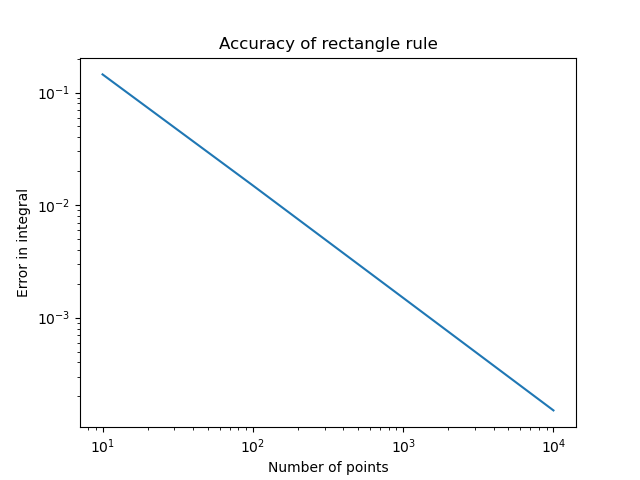

Text(0.5, 1.0, 'Accuracy of rectangle rule')

In [11]:
# Define function to integrate
def dfx(x):
    """Differential of x^3"""
    return 3*x*x

# Storage and numbers of points
diff = np.zeros(4)
pointsarr = np.array((10,100,1000,10000))

# Loop, display result and store error (analytically the integral is 1)
print("Approach using loop over elements")
for i, N in enumerate(pointsarr):
    print(f"With {N:5} points, integral of 3x^2 from 0 to 1 is {rectangle_int(dfx,0,1,N)}")
    diff[i] = 1.0 - rectangle_int(dfx,0,1,N)

# Check that the second approach gives the same results
print("Approach using Numpy array")
for N in [10,100,1000,10000]:
    print(f"With {N:5} points, integral of 3x^2 from 0 to 1 is {rectangle_int2(dfx,0,1,N)}")

# Plot accuracy on a log-log plot
plt.loglog(pointsarr,diff)
plt.xlabel("Number of points")
plt.ylabel("Error in integral")
plt.title("Accuracy of rectangle rule")

Note that the integral should evaluate to 1.

### Question 3

In [12]:
def xcos(x):
    """Calculate x*cos(x)"""
    return x*np.cos(x)

# Evaluate integral with varying numbers of points
for i in [5,10,20,50,100,200,500,1000]:
    print(f"Integral of x cos(x) from 0 to 1 is {rectangle_int(xcos,0,1,i):11.8f} with {i:4} points")

Integral of x cos(x) from 0 to 1 is  0.32340089 with    5 points
Integral of x cos(x) from 0 to 1 is  0.35367356 with   10 points
Integral of x cos(x) from 0 to 1 is  0.36799464 with   20 points
Integral of x cos(x) from 0 to 1 is  0.37632689 with   50 points
Integral of x cos(x) from 0 to 1 is  0.37906094 with  100 points
Integral of x cos(x) from 0 to 1 is  0.38041982 with  200 points
Integral of x cos(x) from 0 to 1 is  0.38123255 with  500 points
Integral of x cos(x) from 0 to 1 is  0.38150303 with 1000 points


### Question 4

In [13]:
def trapezium_int(f,a,b,N):
    """Implement integration using trapezium rule
    Inputs:
    f    (function to be integrated)
    a, b (limits in integration)
    N    (number of points)
    Returns value of integral"""
    # End points
    integral= 0.5 * (f(a) + f(b))
    dx = (b-a)/N
    for i in range(1,N): # We want to go from 1 to N-1
        integral += f(a+i*dx)
    integral *= dx
    return integral

Integral of x cos(x) from 0 to 1 is  0.37743112 with    5 points
Integral of x cos(x) from 0 to 1 is  0.38068867 with   10 points
Integral of x cos(x) from 0 to 1 is  0.38150219 with   20 points
Integral of x cos(x) from 0 to 1 is  0.38172992 with   50 points
Integral of x cos(x) from 0 to 1 is  0.38176245 with  100 points
Integral of x cos(x) from 0 to 1 is  0.38177058 with  200 points
Integral of x cos(x) from 0 to 1 is  0.38177286 with  500 points
Integral of x cos(x) from 0 to 1 is  0.38177318 with 1000 points


<IPython.core.display.Javascript object>


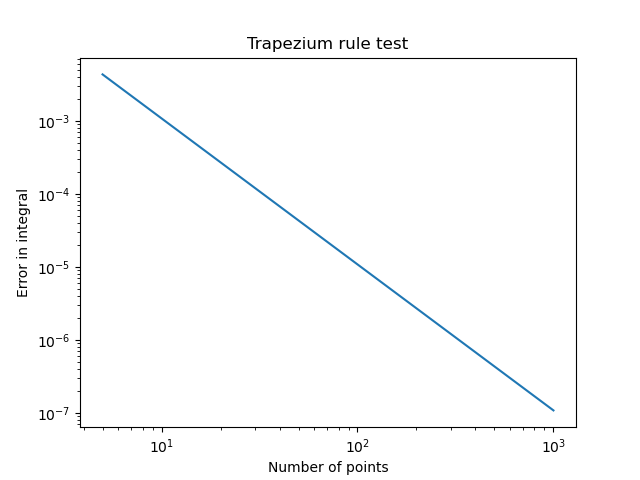

Text(0.5, 1.0, 'Trapezium rule test')

In [14]:
# Number of points and storage
pointsarrt = np.array((5,10,20,50,100,200,500,1000))
res_t = np.zeros_like(pointsarrt,dtype=float)
# Exact result
exact_result = np.cos(1.0)+np.sin(1.0)-1.0
# Evaluate
for i, N in enumerate(pointsarrt):
    print(f"Integral of x cos(x) from 0 to 1 is {trapezium_int(xcos,0,1,N):11.8f} with {N:4} points")
    # Find error using exact result: cos(1) + sin(1) - 1
    res_t[i] = abs(exact_result - trapezium_int(xcos,0,1,N))
    
# PLot error
plt.loglog(pointsarrt, res_t)
plt.xlabel("Number of points")
plt.ylabel("Error in integral")
plt.title("Trapezium rule test")

In [15]:
print("Exact answer for integral of x cos(x) from 0 to 1 is ",np.cos(1)+np.sin(1)-1)

Exact answer for integral of x cos(x) from 0 to 1 is  0.38177329067603627


Note how the trapezium rule, though not obviously very different to the rectangle rule, is much more accurate.  In particular, the gradient of the error is much steeper with number of points.

## 5.2 Library functions

#### Question 1

In [16]:
from scipy import integrate
x = np.linspace(0,1,101)
print("Trapezium rule: ",integrate.trapezoid(xcos(x),x))
print("Simpsons rule:  ",integrate.simpson(xcos(x),x))

Trapezium rule:  0.3817624475728705
Simpsons rule:   0.381773290799403


We see that the Simpson's rule approach is *extremely* accurate, compared to the trapezium rule for the same number of points.